In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pyomo.environ import *
from pyomo.network import *
from idaes.core.util.model_statistics import degrees_of_freedom
from Method import *

In [2]:
from hda_flowsheet import hda_flowsheet

In [3]:
m = hda_flowsheet()

Building flowsheet...

Setting inputs...

Initializing flowsheet...

Initialization complete for 'R101'! 
Initialization complete for 'F101'! 
model.name="F102";
    - termination condition: infeasible
    - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible
      point. Problem may be infeasible.
Initialization complete for 'F102'! 
Initialization complete for 'S101'! 
Initialization complete for 'M101'! 
Initialization complete for 'H101'! 
Initialization complete for 'R101'! 
Initialization complete for 'F101'! 
Initialization complete for 'S101'! 
Initialization complete for 'M101'! 
Initialization complete for 'H101'! 
Initialization complete for 'R101'! 
Initialization complete for 'F101'! 
Initialization complete for 'S101'! 
Initialization complete for 'M101'! 
Initialization complete for 'H101'! 
Initialization complete for 'R101'! 
Initialization complete for 'F101'! 
Initialization complete for 'S101'! 
Initialization complete for 'M101'! 
Initialization

In [4]:
degrees_of_freedom(m)

0

In [5]:
# objective, relaxation, constraints
m.objective = Objective(expr=m.operating_cost)

m.H101.Outlet.T.unfix()
m.R101.Q.unfix()
m.F101.Vap_Outlet.T.unfix()
m.F102.Vap_Outlet.T.unfix()
m.F102.Vap_Outlet.P.unfix()

m.H101.Outlet.T.setlb(500)
m.H101.Outlet.T.setub(600)

m.R101.Outlet.T.setlb(600)
m.R101.Outlet.T.setub(800)

m.F101.Vap_Outlet.T.setlb(298.0)
m.F101.Vap_Outlet.T.setub(450.0)
m.F102.Vap_Outlet.P.setlb(105000)
m.F102.Vap_Outlet.P.setub(165000)

m.overhead_loss = Constraint(expr=m.loss<=0.05)
m.purity_quality = Constraint(expr=m.purity >= 0.78)
m.product_flow = Constraint(expr=m.product >= 0.15)

In [6]:
solver = SolverFactory('ipopt')
solver.options['tol'] = 1e-3
results = solver.solve(m)

In [7]:
stream_information(m)

,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11
温度/˚C,30.0,30.0,32.44,226.85,424.34,35.19,35.19,35.19,35.19,89.37,89.37
压力/kPa,350.0,350.0,350.0,350.0,350.0,350.0,350.0,350.0,350.0,105.0,105.0
相态,气相,气相,气液共存,气相,气相,气相,气相,气相,液相,气相,液相
摩尔流量kmol/hr,1.152,1.080,7.036,7.036,7.036,6.004,4.804,1.201,1.031,0.667,0.364
质量流率kg/hr,-,-,-,-,-,-,-,-,-,-,-
->苯,0.0,0.0,16.13,16.13,80.63,20.16,16.13,4.03,60.47,42.18,18.29
->甲苯,0.0,99.51,101.44,101.44,25.36,2.42,1.93,0.48,22.95,10.97,11.98
->甲烷,1.16,0.0,58.28,58.28,71.53,71.41,57.13,14.28,0.12,0.12,0.0
->氢气,2.18,0.0,4.22,4.22,2.56,2.56,2.05,0.51,0.0,0.0,0.0
质量分率,-,-,-,-,-,-,-,-,-,-,-


In [7]:
print_outcome(m)

Optimal Values: 
	 H101 outlet temperature =  500.0 K
	 R101 outlet temperature =  697.4866954840015 K
	 F101 outlet temperature =  308.34426362187537 K
	 F102 outlet temperature =  362.5171003073246 K
	 F102 outlet pressure =  105000.0 Pa

Optimal Outcome: 
	 operating cost  = $ 283477.7796894641
	 benzene purity  = 0.7917913719536541
	 benzene product = 0.14999999003684336
	 Overhead loss   = 0.05000000991156696


In [20]:
plt.style.use("seaborn")

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [32]:
plt.style.use("seaborn-poster")

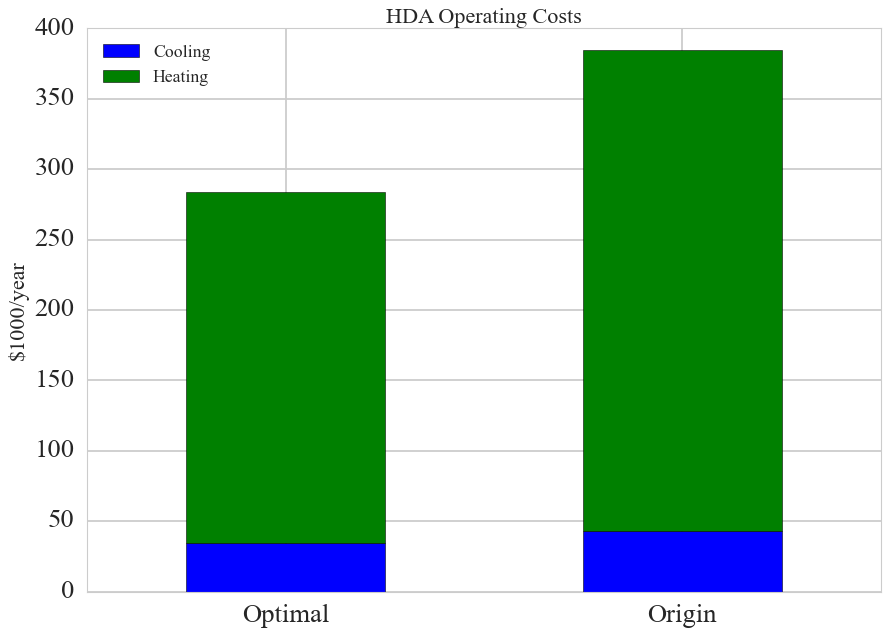

In [50]:
origin_outcome = {
    "Cooling": value(3600 * 8000 * n.cooling_cost)/1e+3,
    "Heating": value(3600 * 8000 * n.heating_cost)/1e+3,
    "Purity": value(n.purity),
    "Product": value(n.product),
    "Loss": value(n.loss)
}

optima_outcome = {
    "Cooling": value(3600 * 8000 * m.cooling_cost)/1e+3,
    "Heating": value(3600 * 8000 * m.heating_cost)/1e+3,
    "Purity": value(m.purity),
    "Product": value(m.product),
    "Loss": value(m.loss)
}

origin_outcomedf = pd.DataFrame(
    list(origin_outcome.items()), columns=["Item", "Origin"]
).set_index("Item")
optima_outcomedf = pd.DataFrame(
    list(optima_outcome.items()), columns=["Item", "Optimal"]
).set_index("Item")
outcome = origin_outcomedf.add(optima_outcomedf, fill_value=0).fillna(0).transpose()
outcome

#print(":")
#display(opcosts)  # view dataframe before plotting
costs = outcome.iloc[:, :2]
cost_plot = costs.plot(
    kind="bar", stacked = True,fontsize=24
)
#plt.xlabel(None, fontsize=24, fontname='Times New Roman')
plt.ylabel('$1000/year', fontsize=20, fontname='Times New Roman')
plt.title("HDA Operating Costs",fontsize=20, fontname='Times New Roman')
plt.legend(loc='best',prop={'family': 'Times New Roman'})
plt.xticks(fontname='Times New Roman',rotation=0)
plt.yticks(np.arange(0, 410, 50),fontname='Times New Roman')

plt.savefig('HDA Operating Costs.png', format='png', dpi=450)

<AxesSubplot:title={'center':'HDA benzene purity'}, ylabel='benzene purity'>

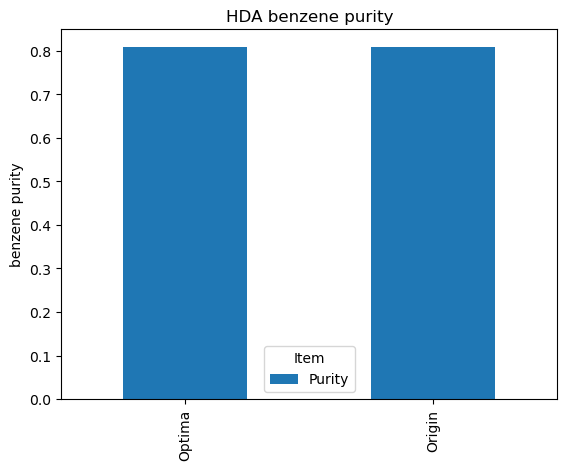

In [61]:
pur = outcome.iloc[:, 2:3]
pur.plot(
    kind="bar", stacked = True, title="HDA benzene purity", ylabel="benzene purity"
)

In [ ]:
origin_operation_cost = {
    "Cooling": value(3600 * 8000 * n.cooling_cost),
    "Heating": value(3600 * 8000 * n.heating_cost),
}

optima_operation_cost = {
    "Cooling": value(3600 * 8000 * m.cooling_cost),
    "Heating": value(3600 * 8000 * m.heating_cost),
}


origin_opdf = pd.DataFrame(
    list(origin_operation_cost.items()), columns=["Utility", "Origin"]
).set_index("Utility")
optima_opdf = pd.DataFrame(
    list(optima_operation_cost.items()), columns=["Utility", "Optima"]
).set_index("Utility")
opcosts = origin_opdf.add(optima_opdf, fill_value=0).fillna(0).transpose()


print(":")
#display(opcosts)  # view dataframe before plotting

opcosts.plot(
    kind="bar", stacked = True, title="HDA Operating Costs", ylabel="$1000/year"
)

In [7]:
print("new:")
print_outcome(m)

new:
Optimal Values: 
	 H101 outlet temperature =  500.0 K
	 R101 outlet temperature =  697.486695484181 K
	 F101 outlet temperature =  308.3442636224523 K
	 F102 outlet temperature =  365.5876719613391 K
	 F102 outlet pressure =  115000.0 Pa

Optimal Outcome: 
	 operating cost  = $ 284116.3035121963
	 benzene purity  = 0.8087768020121621
	 benzene product = 0.14999999003701064
	 Overhead loss   = 0.05000000991257592


In [10]:
for block in m.component_data_objects(Block, descend_into=False):
    if 's' not in block.name:
        print(block.name)

R101
H101
F101
F102
M101
S101
